This is my attempt for plotting the VAD data from the Morton case in 2022 using Coniglio and Parker 2020 Fig. 6 as a reference.
coords.py is a file created by Dr. Eric Bruning

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import coords
import xarray as xr
import pyart


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



C:\Users\julia\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
"""
# SEE FIXED PLOT LATER IN NOTEBOOK

#polar plot from matplotlib

#r = np.arange(0, 2, 0.01)
#theta = 2 * np.pi * r

distance = np.arange(0, 200, 40)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
#ax.plot(theta, r) <== plots a line along r and theta
ax.set_rmax(2)
ax.set_rticks(distance)  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True, linestyle = ':')
#ax.set_rlim([0, 120])
ax.set_thetamax(180)
ax.set_thetamin(-179)
#ax.set_title("A line plot on a polar axis", va='bottom')
ax.set_theta_direction(-1)
ax.set_theta_direction(1)
plt.show()
"""

'\n# SEE FIXED PLOT LATER IN NOTEBOOK\n\n#polar plot from matplotlib\n\n#r = np.arange(0, 2, 0.01)\n#theta = 2 * np.pi * r\n\ndistance = np.arange(0, 200, 40)\n\nfig, ax = plt.subplots(subplot_kw={\'projection\': \'polar\'})\n#ax.plot(theta, r) <== plots a line along r and theta\nax.set_rmax(2)\nax.set_rticks(distance)  # Less radial ticks\nax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line\nax.grid(True, linestyle = \':\')\n#ax.set_rlim([0, 120])\nax.set_thetamax(180)\nax.set_thetamin(-179)\n#ax.set_title("A line plot on a polar axis", va=\'bottom\')\nax.set_theta_direction(-1)\nax.set_theta_direction(1)\nplt.show()\n'

In [3]:
# bring in the morton data
# gps data for first ka
ka1gps = pd.read_csv('C:/Users/julia/Desktop/Research/GPS_Ka1_20220523.txt')
# scan data for first ka
ka1scan = pd.read_csv('C:/Users/julia/Desktop/Research/20220523_Ka1_scan_log.txt', dtype=str,
                     parse_dates=[0])

# dealiased vad data created from VADS.ipynb for ka 1, but not bearing corrected
vad_fileska1 = sorted(glob.glob('C:/Users/julia/Desktop/Research/product_raw_ka1/*.nc'))

#print(vad_fileska1)
#print(ka1gps)
# let's try using the gps data to plot on the circle
# pull up lat and lon and do a coordinate transformation to have the storm motion be the center of the new tpcs
# have to do coord transformation to ECEF first though

In [4]:
# Brandon's code
#%reset
#import matplotlib.pyplot as plt
#import numpy as np
#import pandas as pd
#import glob
#import coords
#import xarray as xr

#ka1_data=pd.read_csv('C:/Users/julia/Desktop/Research/GPS_Ka1_20220523.txt')
#Lat=ka1_data.Latitude
#Lon=ka1_data.Longitude

#fig=plt.figure(1,figsize=(15,12),dpi=500)
#fig.patch.set_facecolor('white')

#ax=plt.subplot(111)
#ax.scatter(Lat,Lon)

In [5]:
#print(ka1gps)
# FWI: .loc[row, column], so below we select all the rows of the single column "Latitude" or "Longitude" to get all indeces from columns
#lat = ka1gps.loc[:, ["Latitude"]]
#lon = ka1gps.loc[:,["Longitude"]]

lat=ka1gps.Latitude # <== easier way to grab column
lon=ka1gps.Longitude
print(lat)
print(lon)

alt = np.zeros_like(lat)

0        33.588547
1        33.588547
2        33.588547
3        33.588547
4        33.588547
           ...    
31901    33.589625
31902    33.589630
31903    33.589645
31904    33.589662
31905    33.589678
Name: Latitude, Length: 31906, dtype: float64
0       -102.031783
1       -102.031783
2       -102.031783
3       -102.031783
4       -102.031783
            ...    
31901   -102.032235
31902   -102.032227
31903   -102.032210
31904   -102.032200
31905   -102.032198
Name: Longitude, Length: 31906, dtype: float64


In [6]:
# trying to plot lat and lon to see if the data is being accessed
fig=plt.figure(1,figsize=(25,24),dpi=500)
ax = plt.subplot(111)
ax.scatter(lon, lat)
ax.set_xlabel('lon')
ax.set_ylabel('lat')

Text(0, 0.5, 'lat')

In [7]:
# convert lat lon distance to meters

In [8]:
# do i really need to convert them out of lon, lat? could i just plot them on the graph in lon, lat relative to storm?
# take difference bewteen lat, lon of storm and point location and convert it to meters?

# to convert this difference and turn it to meters use great circle distance:
    # d=2*asin(sqrt((sin((lat1-lat2)/2))^2 + cos(lat1)*cos(lat2)*(sin((lon1-lon2)/2))^2))
    
    # from: https://edwilliams.org/avform147.htm#Dist


In [35]:
#Read in storm location csv

storm_location = pd.read_csv(r"C:\Users\julia\Desktop\Research\StormLocationMorton.csv", header=0)
storm_location['Date']=storm_location['Date'].astype(str).str.zfill(8)
storm_location['Time']=storm_location['Time'].astype(str).str.zfill(8)
#storm_location['Date']=storm_location['Date'].astype(str).str[:6]+str(20)+storm_location['Date'].astype(str).str[-2:]
storm_location['datetime'] = pd.to_datetime(storm_location['Date'].astype(str)+storm_location['Time'].astype(str),format='%m/%d/%Y%H:%M:%S')

storm_location['Lon'] = storm_location['Lon'].astype(str).str.zfill(8)
storm_lon = storm_location['Lon'].astype(float) # .astype(float) changes it from string to float since you cant operate on strings

print(storm_lon)

storm_location['Lat'] = storm_location['Lat'].astype(str).str.zfill(8) 
storm_lat = storm_location['Lat'].astype(float)

print(storm_lat)
print(storm_location)

0    -103.098
1    -103.073
2    -103.061
3    -103.058
4    -103.054
       ...   
59   -102.204
60   -102.155
61   -102.119
62   -102.105
63   -102.067
Name: Lon, Length: 64, dtype: float64
0     33.497
1     33.510
2     33.522
3     33.553
4     33.584
       ...  
59    33.650
60    33.650
61    33.650
62    33.650
63    33.650
Name: Lat, Length: 64, dtype: float64
         Lat       Lon      Time       Date            datetime
0   0033.497  -103.098  21:55:00  5/23/2022 2022-05-23 21:55:00
1   00033.51  -103.073  22:00:00  5/23/2022 2022-05-23 22:00:00
2   0033.522  -103.061  22:05:00  5/23/2022 2022-05-23 22:05:00
3   0033.553  -103.058  22:10:00  5/23/2022 2022-05-23 22:10:00
4   0033.584  -103.054  22:15:00  5/23/2022 2022-05-23 22:15:00
..       ...       ...       ...        ...                 ...
59  00033.65  -102.204  02:50:00  5/24/2022 2022-05-24 02:50:00
60  00033.65  -102.155  02:55:00  5/24/2022 2022-05-24 02:55:00
61  00033.65  -102.119  03:00:00  5/24/2022 2022-05

In [36]:
# From lat vehicle and lat storm differences/ lon vehicle lon storm differences to meters

# import storm lat lon
# take storm lat(lon) and subtract from lat(lon)vehicle <== make function
# use d=2*asin(sqrt((sin((lat1-lat2)/2))^2 + cos(lat1)*cos(lat2)*(sin((lon1-lon2)/2))^2)) to convert lat  to meters

def coordinates_to_meters(lat1, lat2, lon1, lon2):
    d=2*np.arcsin(np.sqrt((np.sin((lat1-lat2)/2))**2 + np.cos(lat1)*np.cos(lat2)*(np.sin((lon1-lon2)/2))**2))
    return d

In [37]:
#a = []
#a.append(coordinates_to_meters(lat, storm_lat, lon, storm_lon))
#print(a)

# use for loop to iterate through function?

dfs = [] # dfs =  distance from storm

#for i in np.arange(0,len(storm_location)):
    #cms = coordinates_to_meters(lat[i], storm_lat[i], lon[i], storm_lon[i])
    #cms = coordinates_to_meters(ka1gps.loc[i].Latitude, storm_location.loc[i].Lat, ka1gps.loc[i].Longitude, storm_location.loc[i].Lon)
    #dfs.append(cms)


for i in np.arange(0,len(storm_location)):
    cms = coordinates_to_meters(lat[i], storm_lat[i], lon[i], storm_lon[i])
    dfs.append(cms)

In [38]:
# convert lat and lon into ECEF and then into polar
from coords import GeographicSystem
geo = GeographicSystem()
X, Y, Z = geo.toECEF(lon,lat,alt)
print(X)
print("")
print(Y)
print("")
print(Z)

[-1108693.68267522 -1108693.68267522 -1108693.68267522 ...
 -1108718.40421672 -1108717.27888377 -1108716.89264097]

[-5201803.2982315  -5201803.2982315  -5201803.2982315  ...
 -5201729.14038947 -5201728.31364845 -5201727.39211539]

[3508519.78723698 3508519.78723698 3508519.78723698 ... 3508621.23708693
 3508622.80779409 3508624.28610643]


In [39]:
# convert into tpcs centered at storm motion?
# need storm motion in degrees

In [40]:
# plot morton points on lon, lat
# determine center point so the plots actually show up

In [47]:
# Code from Alex S and Josh O
# BRANDON MODIFIED (ORIGINAL BELOW)

#Calculate storm motion 

decimalhour=[]
decimalsec=[]
for i in np.arange(0,len(storm_location),1):
    (h, m, s) = storm_location.loc[i].Time.split(':')
    result = int(h) + int(m)/60 + int(s)/3600
    result1 = int(h) * 3600 + int(m) * 60 + int(s)
    decimalsec.append(result1)
    decimalhour.append(result)
storm_location['decimalhour']=decimalhour
storm_location['decimalsec']=decimalsec
storm_decimalsec=storm_location.decimalsec.astype(float)


from math import sin, cos, sqrt, atan2, radians

def calc_velocity(lat1,lon1,lat2,lon2,time1,time2):
    R = 6371 # Radius of the earth in km
    dLat = radians(lat2-lat1)
    dLon = radians(lon2-lon1)
    rLat1 = radians(lat1)
    rLat2 = radians(lat2)
    a = sin(dLat/2) * sin(dLat/2) + cos(rLat1) * cos(rLat2) * sin(dLon/2) * sin(dLon/2) 
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    d = R * c * 1000 # Distance in m
    return d / (time2 - time1)

def get_bearing(lat1, long1, lat2, long2):
    dLon = (long2 - long1)
    x = cos(radians(lat2)) * sin(radians(dLon))
    y = cos(radians(lat1)) * sin(radians(lat2)) - sin(radians(lat1)) * cos(radians(lat2)) * cos(radians(dLon))
    brng = np.arctan2(x,y)
    brng = (np.degrees(brng)+180) % 360
    return brng

velocity1=[]
direction1=[]
for i in np.arange(0,len(storm_location)-1,1):
    velocity = calc_velocity(storm_lat[i],storm_lon[i],
                             storm_lat[i+1],storm_lon[i],
                             storm_decimalsec[i],storm_decimalsec[i+1])
    velocity1.append(velocity)
    direction = get_bearing(storm_lat[i],storm_lon[i],
                             storm_lat[i+1],storm_lon[i+1])
    direction1.append(direction)
velocity1 = np.append([np.nan],velocity1)
direction1 = np.append([np.nan],direction1)
storm_location['storm_vel']=velocity1 #m/s
storm_location['storm_dir']=direction1 #deg

print(velocity1)
print(direction1)

[        nan  4.81844682  4.44779707 11.49014242 11.49014242 11.49014242
  7.04234535  8.89559413 10.74884291  7.78364487  8.52494438  8.89559413
  4.44779707  1.48259902 10.37819315  2.59454829  9.26624389  8.15429462
  5.18909658  0.74129951  0.          6.6716956   0.74129951  0.
  0.         -0.          0.          0.          0.          0.
  1.85324878  1.48259902  1.11194927  0.          3.3358478   0.
 10.0075434   0.74129951  0.37064976  0.          2.96519804  1.11194927
  6.6716956   0.37064976  0.37064976  0.74129951  8.52494438 13.71404095
  5.18909658  7.41299511  4.44779707  2.59454829  0.74129951  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.        ]
[         nan 238.04494955 219.81572456 184.61087323 186.13536102
 190.64982257 182.50913365 230.51188858 206.00087445 231.72536316
 192.24072632 189.82681541 224.12139235 258.65625452 202.56217015
 246.08375524 185.69254507 186.46097246 196.51748661 180.
 180

In [48]:
# Code from Alex S and Josh O

#Calculate storm motion 

"""
decimalhour=[]
decimalsec=[]
for i in np.arange(0,len(storm_location),1):
    (h, m, s) = storm_location.loc[i].Time.split(':')
    result = int(h) + int(m)/60 + int(s)/3600
    result1 = int(h) * 3600 + int(m) * 60 + int(s)
    decimalsec.append(result1)
    decimalhour.append(result)
storm_location['decimalhour']=decimalhour
storm_location['decimalsec']=decimalsec


from math import sin, cos, sqrt, atan2, radians

def calc_velocity(lat1,lon1,lat2,lon2,time1,time2):
    R = 6371 # Radius of the earth in km
    dLat = radians(lat2-lat1)
    dLon = radians(lon2-lon1)
    rLat1 = radians(lat1)
    rLat2 = radians(lat2)
    a = sin(dLat/2) * sin(dLat/2) + cos(rLat1) * cos(rLat2) * sin(dLon/2) * sin(dLon/2) 
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    d = R * c * 1000 # Distance in m
    return d / (time2 - time1)

def get_bearing(lat1, long1, lat2, long2):
    dLon = (long2 - long1)
    x = cos(radians(lat2)) * sin(radians(dLon))
    y = cos(radians(lat1)) * sin(radians(lat2)) - sin(radians(lat1)) * cos(radians(lat2)) * cos(radians(dLon))
    brng = np.arctan2(x,y)
    brng = (np.degrees(brng)+180) % 360

    return brng

velocity1=[]
direction1=[]
for i in np.arange(0,len(storm_location)-1,1):
    velocity = calc_velocity(storm_location.loc[i].Lat,storm_location.loc[i].Lon,
                             storm_location.loc[i+1].Lat,storm_location.loc[i+1].Lon,
                             storm_location.loc[i].decimalsec,storm_location.loc[i+1].decimalsec)
    velocity1.append(velocity)
    direction = get_bearing(storm_location.loc[i].Lat,storm_location.loc[i].Lon,
                             storm_location.loc[i+1].Lat,storm_location.loc[i+1].Lon)
    direction1.append(direction)
velocity1 = np.append([np.nan],velocity1)
direction1 = np.append([np.nan],direction1)
storm_location['storm_vel']=velocity1 #m/s
storm_location['storm_dir']=direction1 #deg
"""

"\ndecimalhour=[]\ndecimalsec=[]\nfor i in np.arange(0,len(storm_location),1):\n    (h, m, s) = storm_location.loc[i].Time.split(':')\n    result = int(h) + int(m)/60 + int(s)/3600\n    result1 = int(h) * 3600 + int(m) * 60 + int(s)\n    decimalsec.append(result1)\n    decimalhour.append(result)\nstorm_location['decimalhour']=decimalhour\nstorm_location['decimalsec']=decimalsec\n\n\nfrom math import sin, cos, sqrt, atan2, radians\n\ndef calc_velocity(lat1,lon1,lat2,lon2,time1,time2):\n    R = 6371 # Radius of the earth in km\n    dLat = radians(lat2-lat1)\n    dLon = radians(lon2-lon1)\n    rLat1 = radians(lat1)\n    rLat2 = radians(lat2)\n    a = sin(dLat/2) * sin(dLat/2) + cos(rLat1) * cos(rLat2) * sin(dLon/2) * sin(dLon/2) \n    c = 2 * atan2(sqrt(a), sqrt(1-a))\n    d = R * c * 1000 # Distance in m\n    return d / (time2 - time1)\n\ndef get_bearing(lat1, long1, lat2, long2):\n    dLon = (long2 - long1)\n    x = cos(radians(lat2)) * sin(radians(dLon))\n    y = cos(radians(lat1)) * s

In [49]:
#print(velocity1)
print(direction1)
#direction1.dtype

[         nan 238.04494955 219.81572456 184.61087323 186.13536102
 190.64982257 182.50913365 230.51188858 206.00087445 231.72536316
 192.24072632 189.82681541 224.12139235 258.65625452 202.56217015
 246.08375524 185.69254507 186.46097246 196.51748661 180.
 180.         327.13898397 274.90793375 269.99693647 180.
 180.         180.         180.         180.         269.99554395
 281.33872773 274.98887772 294.29576641 180.         320.28214023
 180.         351.25167494 291.85556448 274.29670632 180.
 311.18717449 279.31176951 327.11395121 273.12367455 274.29515914
 274.1605378  314.64533321 336.8672621  316.43947091 298.6328432
 297.2374733  282.46816214 277.20171398 269.99141117 269.99473588
 269.9925194  269.99141117 269.99335058 269.99529    269.99778353
 269.9864241  269.99002587 269.99612117 269.98947175]


In [50]:
# only need degrees (so the direction) of the storm
# then have to rotate all the plotted points so that the storm motion is on the zero axis
# need range of points and degrees of where theyre at (range, degrees) like (x,y)
# convert to dataframe
# df for data frame so i can use pandas to drop the nan. cant average with nan in list
directiondf = pd.DataFrame(direction1)

direction_corrected = directiondf.dropna()

avg_storm_direction = np.average(direction_corrected)

print(avg_storm_direction) # avg storm direction in degrees

247.85901642897275


In [51]:
# convert avg_storm_direction to negative angle to plot
# we want to be at the same point on the negative half of the unit circle aka clockwise angle
# so we subtract 360
# 247.85901642897275
corrected_avg_storm_direction = avg_storm_direction - 360

print(corrected_avg_storm_direction) # avg storm direction at desired angle in degrees

-112.14098357102725


In [53]:
# -112.14098357102725
# now when we graph it we need to shift the vector to be on the 0 axis, shifting all the points along with it
# convert storm direction to degrees/polar
#casd_rad = np.deg2rad(corrected_avg_storm_direction)
# polar_deg = 180-deg
# r = np.arange(whatever the fuck your range is)
# deg = 
#print(casd_rad)

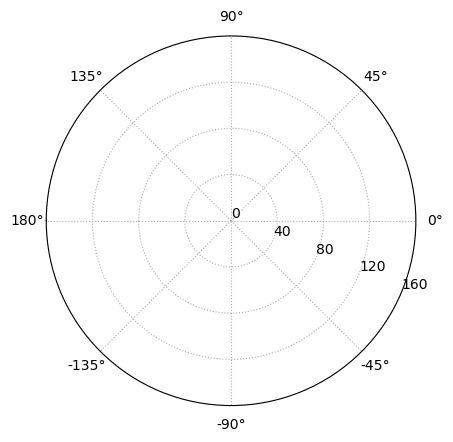

In [54]:
#polar plot from matplotlib

#r = np.arange(0, 80, 0.01)
distance = np.arange(0, 200, 40) #in km
rads = np.arange(0, -np.pi/2)
r = 80

# from Prince: the angles are folding over each other so nothing shows on the graph,
# have to subtract by 180??

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
#ax.plot(rads,r, 'g.') #<== plots a line along r and theta
ax.set_rmax(2)
ax.set_rticks(distance)
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True, linestyle = ':')
ax.set_thetagrids([0,-45,-90, -135, 180, 135, 90, 45])
#ax.set_rlim([0, 120])
ax.set_thetamax(180) # sets positive theta max range
ax.set_thetamin(-180) # sets negative theta range
ax.plot()
for rad in rads: 
    plt.polar(rad, r, 'g.') 
#plt.plot(corrected_avg_storm_direction)
#ax.scatter(corrected_avg_storm_direction,0)
plt.show()

In [73]:
# Code from Alex S and Josh O

# Fixing the bearing
from datetime import datetime

# gps data for first ka
ka1gps = pd.read_csv('C:/Users/julia/Desktop/Research/GPS_Ka1_20220523.txt')
# scan data for first ka
ka1scan = pd.read_csv('C:/Users/julia/Desktop/Research/20220523_Ka1_scan_log.txt', dtype=str,
                     parse_dates=[0])
# dealiased vad data created from VADS.ipynb for ka 1, but not bearing corrected
vad_fileska1 = sorted(glob.glob('C:/Users/julia/Desktop/Research/product_raw_ka1/*.nc'))


for thefile in vad_fileska1[9:]:

    radar = pyart.io.read_cfradial(thefile)
    print(thefile,radar.fixed_angle['data'])
    
    # selects a column and uses it to tell program how to run through data
    datetime = ka1gps['ddmmyy']+ka1gps['hhmmss[UTC]']
    ka1gps['datetime'] = [datetime.strptime(d,'%d%m%y%H%M%S') for d in ka1gps['ddmmyy']+ka1gps['hhmmss[UTC]']]
    #ka1gps['datetime'] = [pd.to_datetime(d,'%d%m%y%H%M%S') for d in ka1gps['ddmmyy']+ka1gps['hhmmss[UTC]']]
    beginscanindex = ka1gps.loc[ka1gps['datetime'] == datetime.strptime(radar.time['units'],'seconds since %Y-%m-%dT%H:%M:%SZ')].index+np.amin(np.unique(radar.time['data']))
    endscanindex = ka1gps.loc[ka1gps['datetime'] == datetime.strptime(radar.time['units'],'seconds since %Y-%m-%dT%H:%M:%SZ')].index+np.amax(np.unique(radar.time['data']))
    dfscan = ka1gps.iloc[beginscanindex[0].astype(int):endscanindex[0].astype(int)]
    dfscan = dfscan.astype({'Bearing[degrees]': 'float'})

    speed = dfscan['Velocity[knots]'].astype(float).mean()
        
    #Get Bearing from deployment log or gps file
    if int(ka1scan.loc[ka1scan['Datetime'] == dfscan.datetime.values[0]].Deployment.values[0]) != 0:
        bearing = float(ka1scan.loc[ka1scan['Datetime'] == dfscan.datetime.values[0]].Heading.values[0])
    else:
        bearing = dfscan['Bearing[degrees]'].mean()
        
    #Manual Corrections
    if bearing == 80.06703703703703:
        bearing = 190
    elif (bearing == 64.25037037037036):
        bearing = 9.980000000000002
    elif (bearing == 89.28925925925924):
        bearing = 92.6
    elif bearing == 269.9640740740741:
        bearing = 90.6
    elif bearing == 206.84615384615387:
        bearing = 149.0
    elif bearing == 263.8211111111111:
        bearing = 90.2
    
    print('Bearing used: '+str(bearing))
    
    lat = dfscan['Latitude'].astype(float)
    lon = dfscan['Longitude'].astype(float)
    
    print(lat)
    print(lon)
    
    display = pyart.graph.RadarMapDisplay(radar)
    
    #Bearing Correction
    radar.azimuth['data']+=(bearing)%360

C:/Users/julia/Desktop/Research/product_raw_ka1\Ka1220523222551.nc [37.001953 45.      ]


AttributeError: 'Series' object has no attribute 'strptime'